In [1]:
import torch
import os
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import sys
sys.path.append('..')

from models.cifar_encoder_classifier import CIFAR10EncoderClassifier
from trainers.encoder_classifier_trainer import EncoderClassifierTrainer


In [2]:
data_path = os.path.join("..", "data")
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=20),
    transforms.RandomAffine(0, translate=(0.2, 0.2)),
    transforms.ToTensor()
])
val_transform = transforms.ToTensor()

Files already downloaded and verified
Files already downloaded and verified
Epoch [1] - Train Loss: 1.6395, Train Acc: 0.3951
Epoch [1] - Val Loss: 1.4348, Val Acc: 0.4900
Epoch [2] - Train Loss: 1.3611, Train Acc: 0.5057
Epoch [2] - Val Loss: 1.2979, Val Acc: 0.5401
Epoch [3] - Train Loss: 1.2398, Train Acc: 0.5503
Epoch [3] - Val Loss: 1.3122, Val Acc: 0.5580
Epoch [4] - Train Loss: 1.1564, Train Acc: 0.5846
Epoch [4] - Val Loss: 1.0049, Val Acc: 0.6352
Epoch [5] - Train Loss: 1.0945, Train Acc: 0.6112
Epoch [5] - Val Loss: 1.2145, Val Acc: 0.5790
Epoch [6] - Train Loss: 1.0448, Train Acc: 0.6291
Epoch [6] - Val Loss: 0.9509, Val Acc: 0.6663
Epoch [7] - Train Loss: 1.0071, Train Acc: 0.6414
Epoch [7] - Val Loss: 0.9420, Val Acc: 0.6684
Epoch [8] - Train Loss: 0.9688, Train Acc: 0.6574
Epoch [8] - Val Loss: 0.9139, Val Acc: 0.6836
Epoch [9] - Train Loss: 0.9317, Train Acc: 0.6712
Epoch [9] - Val Loss: 0.7953, Val Acc: 0.7227
Epoch [10] - Train Loss: 0.9035, Train Acc: 0.6810
Epoch [10

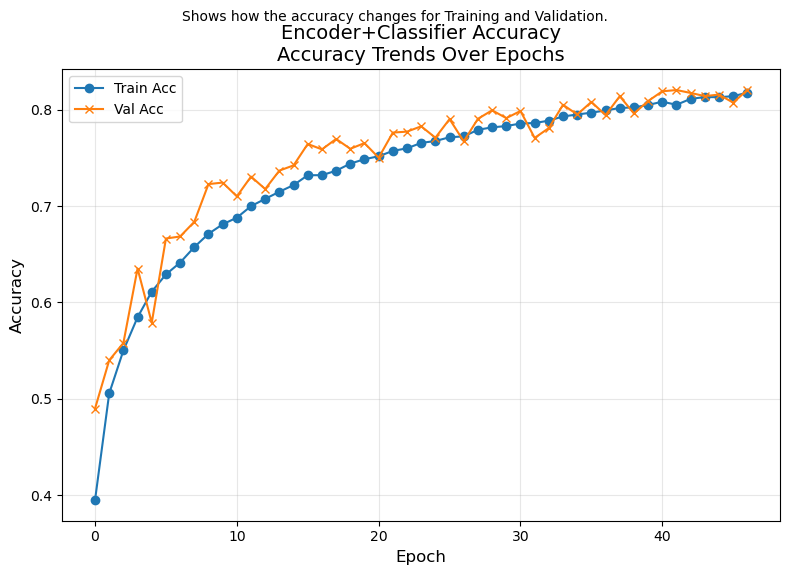

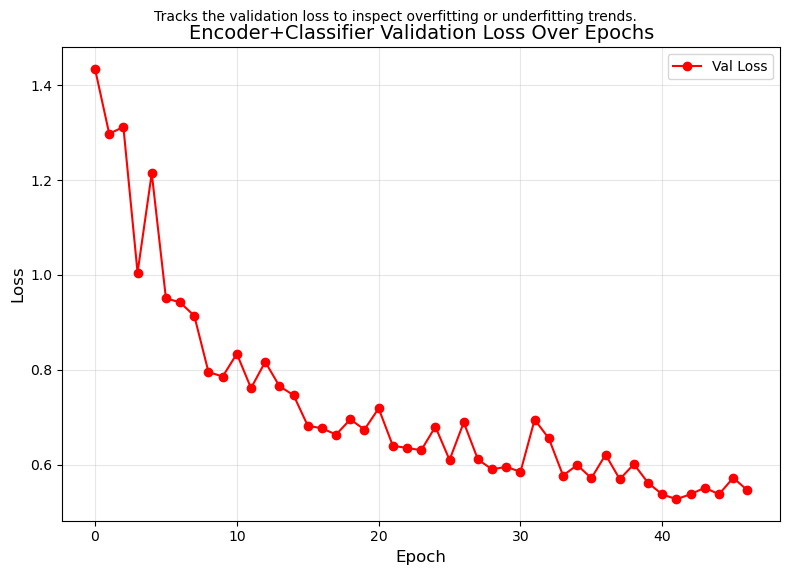

=== Final Encoder+Classifier Metrics ===
Val Loss: 0.5459
Train Acc: 81.75%
Val   Acc: 82.04%


In [6]:
train_dataset = datasets.CIFAR10(root=data_path, train=True, download=True, transform=train_transform)
val_dataset = datasets.CIFAR10(root=data_path, train=False, download=True, transform=val_transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
model = CIFAR10EncoderClassifier(
input_shape=(3, 32, 32),
channels=[64, 128, 256], 
kernel_sizes=[3, 3, 3],
strides=[2, 2, 2],
paddings=[1, 1, 1],
hidden_dims=[1024],
dropout_conv=0.0,
dropout_fc=0.1,
batch_norm_fc=True,
batch_norm_conv=True,
latent_dim=128,
num_classes=10
)
trainer = EncoderClassifierTrainer(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    device='cuda',
    lr=5e-4,
    num_epochs=60,
    weight_decay=3e-5,
    early_stopping=True,
    patience=5
)
trainer.train()
trainer.plot_metrics()

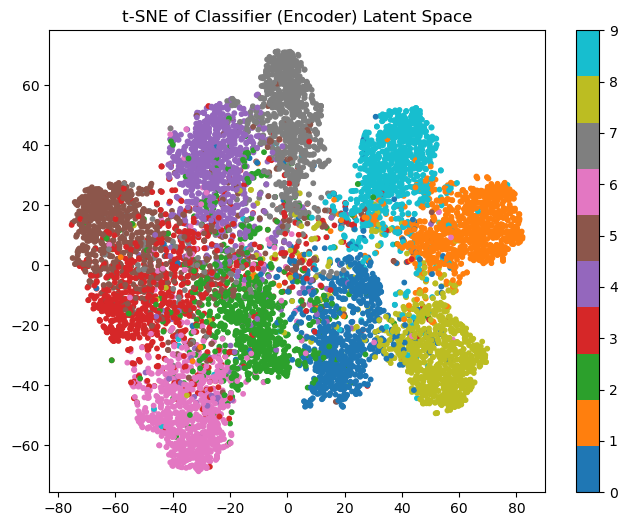

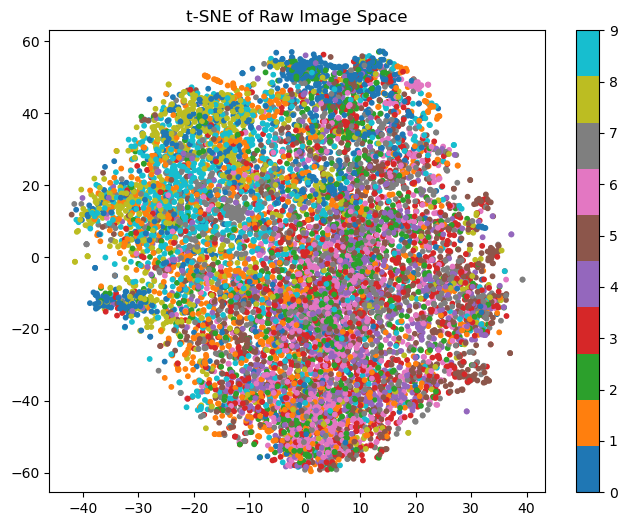

In [8]:
from utils import plot_tsne_classifier
plot_tsne_classifier(model, val_loader, device='cuda')